# Tutorial 2:  Regression and Decision Trees on the Dengue Fever Dataset




**Week 2, Day 5: Climate Response: adaptation and impact**

**By Climatematch Academy**

__Content creators:__ Deepak Mewada, Grace Lindsay

__Content reviewers:__ 

__Content editors:__ 

__Production editors:__ 

___
# Tutorial Objectives

*Estimated timing of tutorial: 50 minutes* 

Welcome to tutorial 2 of a series focused on understanding the role of data science and machine learning in addressing the impact of climate change and adapting to it.

In this tutorial, we will explore a dataset that relates weather variables to dengue fever cases. By the end of the tutorial, you will be able to:

- Load the data into pandas dataframes and visualize it to see obvious trends.
- Apply linear regression to the Dengue dataset, clean the data, implement linear regression using scikit-learn, and evaluate its performance. This will include handling categorical data using dummy variables and using scikit-learn's Poisson GLM method to handle integer-valued data.
- Apply additional methods to the Dengue Fever dataset, including implementing Random Forest Regression, discussing and analyzing its performance, and measuring feature importance.

This tutorial will provide you with practical experience in working with real-world datasets and implementing different regression techniques.


---

In [1]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/kaq2x/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)



---
# Setup

In [2]:
#@title Import necessary libraries:

import numpy as np  # Import the numpy library as np
from sklearn.linear_model import LinearRegression # Import the LinearRegression class from the sklearn.linear_model module
import matplotlib.pyplot as plt # Import the pyplot module from the matplotlib library
import pandas as pd # Import the pandas library and the drive function from the google.colab module
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import cm

<details>
<summary> <font color='Red'>Click here if you are running on local machine or you encounter any error while importing   </font></summary>


**NOTE :**  Please note that if you are running this code on a local machine and encounter an error while importing a library, make sure to install the library via pip. For example, if you receive a "`ModuleNotFoundError: No module named 'library name'`" error , please run "`pip install 'library name'`" to install the required module.

---

# **Section 1: Loading and Exploring Dengue Fever Data Set**


---




In [3]:
# @title Video 1: Video 1 Name
from ipywidgets import widgets
from IPython.display import display, IFrame, YouTubeVideo

out2 = widgets.Output()
with out2:
  class BiliVideo(IFrame):
    def __init__(self, id, page=1, width=400, height=300, **kwargs):
      self.id=id
      src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
      super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="", width=854, height=480, fs=1)
  print(f'Video available at https://www.bilibili.com/video/{video.id}')
  display(video)

out1 = widgets.Output()
with out1:
  video = YouTubeVideo(id="", width=854, height=480, fs=1, rel=0)
  print(f'Video available at https://youtube.com/watch?v={video.id}')
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)



---


## Section 1.1:  Loading the Environmental data

---



As discussed in the video, we are working with a [data set](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/81/) provided by [DrivenData](https://arxiv.org/abs/1606.07781) that centers on the goal of predicting dengue fever cases based on environmental variables.

We will use pandas to interface with the data, which is shared in the .csv format. First, let's load the environmental data into a pandas dataframe and print its contents

In [4]:
import pooch, os
features_fname = "dengue_features_train(1).csv"
if not os.path.exists(features_fname):
    url = "https://osf.io/wm9un/download/"
    features_fname = pooch.retrieve(url, known_hash=None)

# Loading a CSV file named 'dengue_features_train(1).csv' into a pandas DataFrame named 'df'
# The file path is specified as an absolute path to a Google Drive folder.
df_features = pd.read_csv(features_fname)



---


## Section 1.2:  Explore the dataset

---



In [5]:
# Displaying the contents of the DataFrame named 'df'.
# This is useful for verifying that the data was read correctly.
df_features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


We can see some of the variables discussed in the video. For full documentation of these features, see the associated description [here](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/). 

In climate science, visualizing data is an important step in understanding patterns and trends in environmental data. It can also help identify outliers and inconsistencies that need to be addressed before modeling. Therefore, in the next subsection, we will visualize the climate and environmental data to gain insights and identify potential issues.


---
## Section 1.3 Visualise the Data
---

### Coding Exercise 1.1: Inspect the data

For this exercise, you have to visualize the data. Use hint for the function name if you are new to this

*Exercise Objective*: 
1. Use pandas to plot histograms of these features using .hist() function
2. Use the .isnull() function to see if there is any missing data. 

In [6]:
#################################################
## TODO for students:
# Fill in the code in empty places to remove this erro
# raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
#################################################

# Display a histogram of the Pandas DataFrame 'df'
df_features  # hint: invoke hist function here

# Output the sum of null values for each column in 'df'
df_features   # hint: invoke isnull function here and then invoke sum over

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

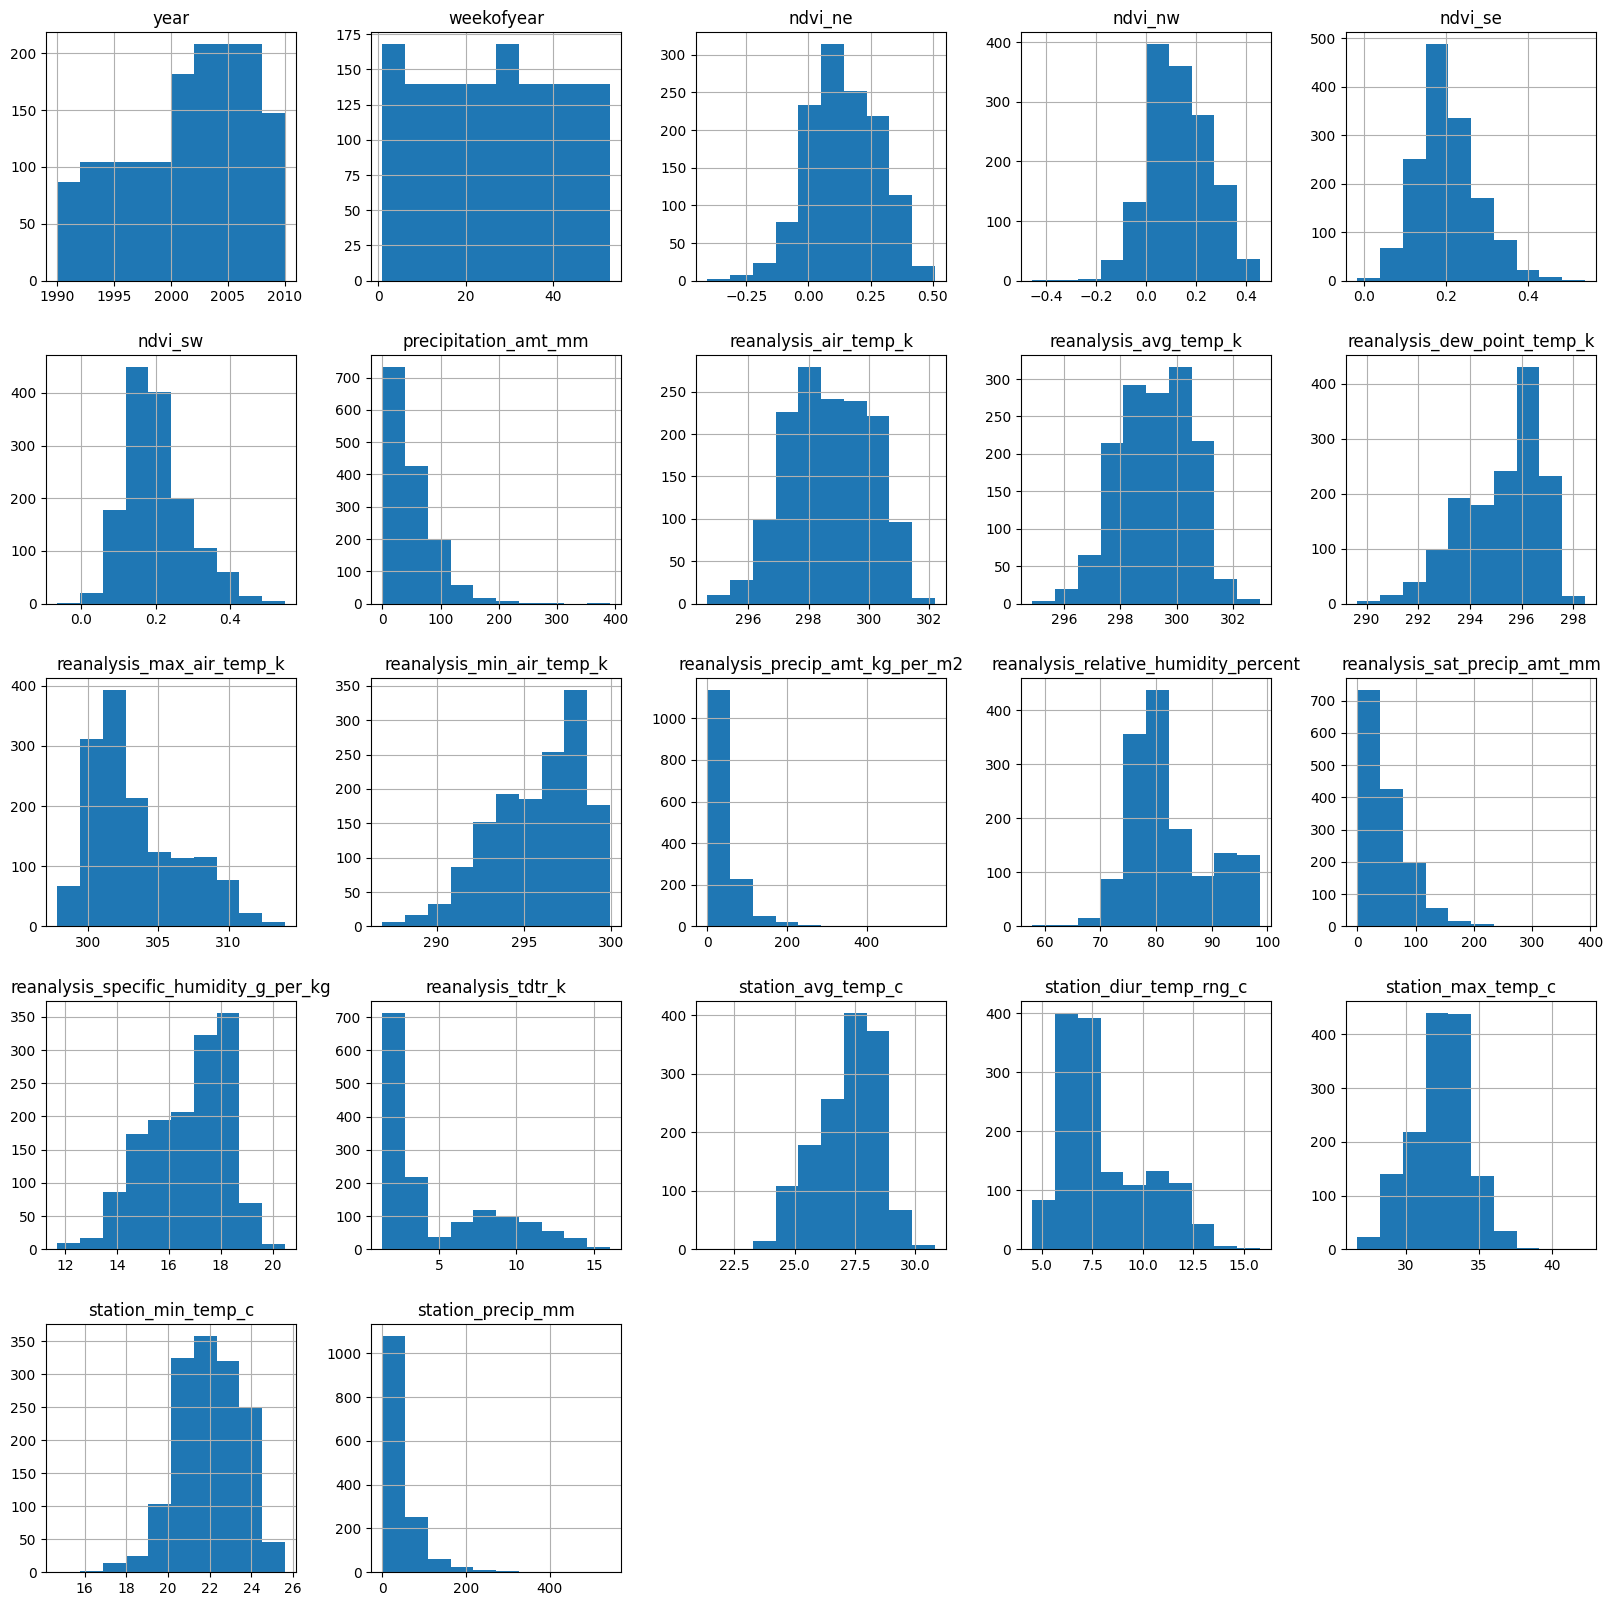

In [7]:
# to_remove solution

# Display a histogram of the Pandas DataFrame 'df'
df_features.hist(figsize=[20,20])

# Output the sum of null values for each column in 'df'
df_features.isnull().sum()

The above histograms show the number of data points that have the value given on the x-axis. As we can see, there is some missing data as well, particularly some of the NDVI measures. 
So far we have only been looking at the enviornmental data. Let's load the corresponding weekly dengue fever cases as well. 


---
## Section 1.4:  Load and Visualise the corresponding weekly dengue fever cases 
---





In [8]:
# Reading a CSV file named "dengue_labels_train.csv" and saving the data into a pandas DataFrame named "df_dengue".
# The file path is specified as an absolute path to a Google Drive folder.
labels_fname = "dengue_labels_train.csv"
if not os.path.exists(labels_fname):
    url = "https://osf.io/6nw9x/download"
    labels_fname = pooch.retrieve(url, known_hash=None)
df_labels = pd.read_csv(labels_fname)

# Displaying the contents of the DataFrame named "df_dengue".
# This is useful for verifying that the data was read correctly.
df_labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


---
## Section 1.5 Visualise the weekly dangue fever cases 
---

### Coding Exercise 1.5: Visualise weekly dangue fever cases 
For this exercise, you have to visualise the data. You can start with ploting a histogram of the case numbers

*Exercise Objective*:  
1. Plot a histogram of the case numbers

In [9]:
#################################################
## TODO for students:
# Fill in the code in empty places to remove this erro
# raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
#################################################

# Display a histogram of the 'total_cases' column in the 'df_dengue' DataFrame
  #todo...        # Write your code here

array([[<Axes: title={'center': 'total_cases'}>]], dtype=object)

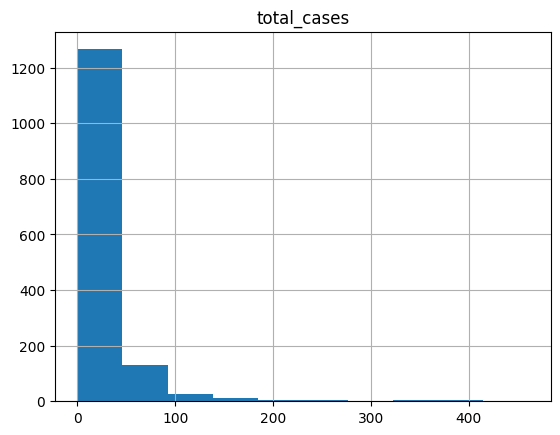

In [10]:
# to_remove solution

# Display a histogram of the 'total_cases' column in the 'df_dengue' DataFrame
df_labels.hist(column='total_cases')

What did you see? In the next exercise we explore the data more and try to find some trends in the data.

### Coding Exercise 1.6: Explore this data a little more. 
In this exercise, you have to explore this data a little more. For your help some objectives are given but you can try out more as well

*Exercise Objective*: 
1. Plot total cases as a function of year
2. Plot total cases as a function of the week of the year
3. Plot total cases as two separate histograms, one for each of the cities.

Play with data and observe the trend in the data

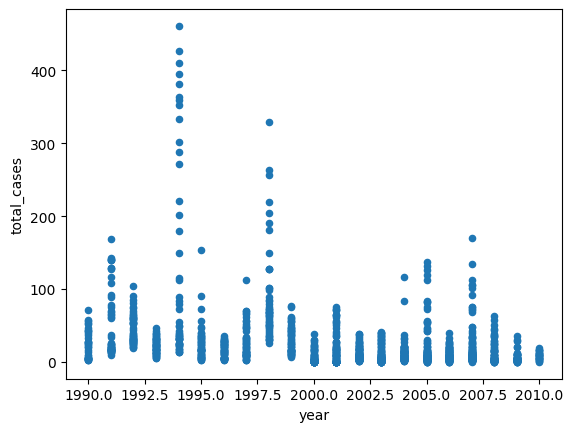

In [11]:
#################################################
## TODO for students:
# Fill in the code in empty places to remove this error
# raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
################################################

# Creating a scatter plot of 'year' vs 'total_cases' in the DataFrame 'df_dengue'.
df_labels.plot.scatter('year','total_cases')

# Creating a scatter plot of 'weekofyear' vs 'total_cases' in the DataFrame 'df_dengue'.
# df_dengue = ...

# Creating a new DataFrame named 'new' that contains only the columns 'total_cases' and 'city' from 'df_dengue'.
new = ...  # hint:you can use .copy()

# Creating histograms of the 'total_cases' column in 'new' separated by the values in the 'city' column.
# new....

array([<Axes: title={'center': 'iq'}>, <Axes: title={'center': 'sj'}>],
      dtype=object)

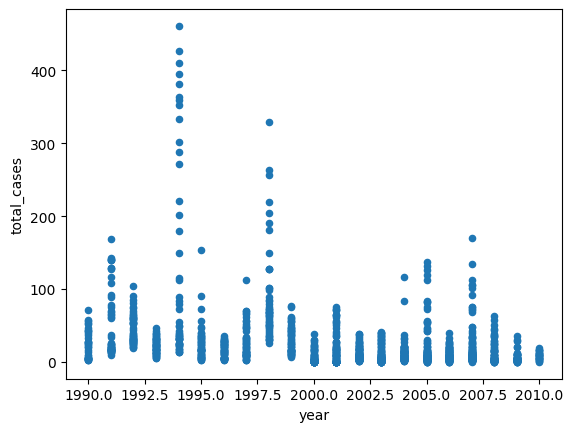

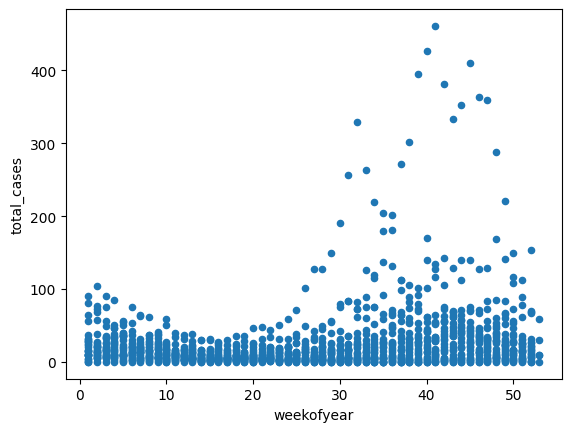

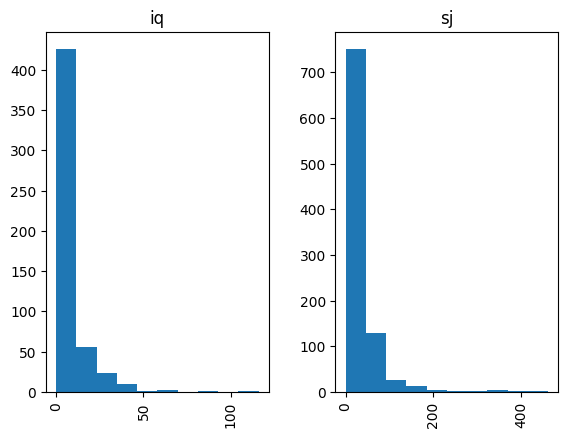

In [12]:
# to_remove solution

# Creating a scatter plot of 'year' vs 'total_cases' in the DataFrame 'df_dengue'.
df_labels.plot.scatter('year','total_cases')

# Creating a scatter plot of 'weekofyear' vs 'total_cases' in the DataFrame 'df_dengue'.
df_labels.plot.scatter('weekofyear','total_cases')

# Creating a new DataFrame named 'new' that contains only the columns 'total_cases' and 'city' from 'df_dengue'.
new = df_labels[['total_cases','city']].copy()

# Creating histograms of the 'total_cases' column in 'new' separated by the values in the 'city' column.
new.hist(by="city")

### Think! : What trends do you see?

Let's delve deeper into the data. What trends do you observe?
Engage in a discussion with your group and see if anyone has noticed a trend that you may have missed.


---
# **Section 2 : Regression on Dengue Fever Dataset**
---
In the previous section, we explored the Dengue dataset. In this section, we will apply linear regression to this dataset.




Since we have already explored and visualised the dataset we are ready to train a model.

We will start by preprocessing the data and defining a model to predict cases of dengue fever.

In the case of predicting dengue fever the environmental variables are the independent variables (or regressors), while number of dengue fever cases is the dependent variable that we want to predict.

---
## Section 2.1:  Data Preprocessing

---




In climate science, data is often incomplete or missing, and it's important to handle such missing values before using the data for prediction or analysis. In this case, we are replacing the missing values with median values and removing unnecessary columns that won't be used in our prediction.



In [13]:
#@title Data Cleaning

# Drop columns 'city', 'year', and 'week_start_date' from the 'df' dataframe to create a new dataframe 'df_cleaned'
df_cleaned = df_features.drop(['city','year','week_start_date'],axis=1)

# Check for null and missing values
print("Null and missing value before cleaning" , df_cleaned.isnull().sum())


Null and missing value before cleaning weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
dtype: int64


In [14]:
# Replace missing values with median
df_cleaned = df_cleaned.fillna(df_cleaned.median())

# Check for null and missing values after replacing
print(df_cleaned.isnull().sum())

weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
dtype: int64


To build a model with the climate data, we need to divide it into a training and test set to ensure that the model works well on held-out data. This is important because, as we have seen, evaluating the model on the exact data it was trained on can be misleading.

In [15]:
df_cleaned

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,21,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,22,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,23,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [16]:
#@title  Train-Test Split

# Select the 'total_cases' column from the 'df_dengue' dataframe and assign it to the variable 'cases'
cases = df_labels['total_cases']

# Create a boolean mask with random values for each element in 'cases'
np.random.seed(145) #setting the random seed ensures we are all using the same train/test split
mask = np.random.rand(len(cases)) < 0.8   #this will use 80% of the data to train and 20% to test

# Create two new dataframes from the 'df_cleaned' dataframe based on the boolean mask
df_cleaned_train = df_cleaned[mask]
df_cleaned_test = df_cleaned[~mask]

# Create two new arrays from the 'cases' array based on the boolean mask
cases_train = cases[mask]
cases_test = cases[~mask]

print(" 80% of the data is split into the training set and remaining 20% into the test set.")

 80% of the data is split into the training set and remaining 20% into the test set.


In [17]:
df_cleaned_test

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
10,28,0.192875,0.082350,0.191943,0.152929,22.27,299.512857,299.592857,296.041429,301.8,...,43.72,81.467143,22.27,17.418571,2.157143,27.557143,7.157143,31.7,21.7,63.7
15,33,0.128817,0.128033,0.206957,0.168243,90.75,299.958571,299.957143,297.035714,302.6,...,101.90,84.178571,90.75,18.515714,1.857143,28.042857,6.685714,32.8,22.8,44.7
21,39,0.116100,0.260900,0.199443,0.244217,51.39,300.427143,300.600000,296.028571,302.4,...,16.40,77.048571,51.39,17.468571,2.257143,28.342857,7.728571,32.8,24.4,15.8
32,50,0.121350,0.261660,0.191386,0.209986,0.00,298.202857,298.278571,292.004286,300.6,...,4.10,68.722857,0.00,13.615714,2.985714,24.685714,7.771429,29.4,19.4,2.8
34,52,0.302500,0.277233,0.171267,0.161622,0.00,298.038571,298.085714,292.105714,299.8,...,5.46,69.681429,0.00,13.682857,2.285714,25.157143,5.842857,28.9,21.1,20.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,15,0.157686,0.156614,0.184014,0.135886,17.33,298.305714,299.557143,297.002857,307.3,...,150.80,93.655714,17.33,18.677143,7.228571,27.150000,9.600000,33.0,21.2,18.0
1446,16,0.231486,0.294686,0.331657,0.244400,86.70,298.438571,299.507143,297.678571,304.7,...,81.40,95.995714,86.70,19.448571,7.757143,27.850000,9.600000,33.5,22.5,51.1
1448,18,0.260814,0.255786,0.257771,0.340286,73.97,297.617143,298.585714,296.975714,304.7,...,85.46,96.712857,73.97,18.602857,5.714286,27.600000,9.600000,33.2,21.4,8.1
1454,24,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [18]:
cases_test

10       8
15      13
21      27
32      47
34      27
        ..
1445     6
1446     8
1448     2
1454     1
1455     4
Name: total_cases, Length: 277, dtype: int64



---


## Section 2.2 Fitting Model and Analyzing Results 

---



### Coding Exercise 2.2: Implement regression on Dengue Fever dataset and evaluate the performance
For this exercise, use what you learned in the previous tutorials to train a linear regression model on the training data and evalute its performance. Evaluate its performance on the training data and the test data. Look specifically at the difference between predicted values and true values on the test set. 

*Exercise Objective*:
1. Train a linear regression model on the training data
2. Evaluate the performance of the model on both training and test data.
3. Look specifically at the difference between predicted values and true values on the test set.

r^2 on training data is: 
r^2 on test data is: 


Text(0, 0.5, 'Predicted Number of Dengue Cases')

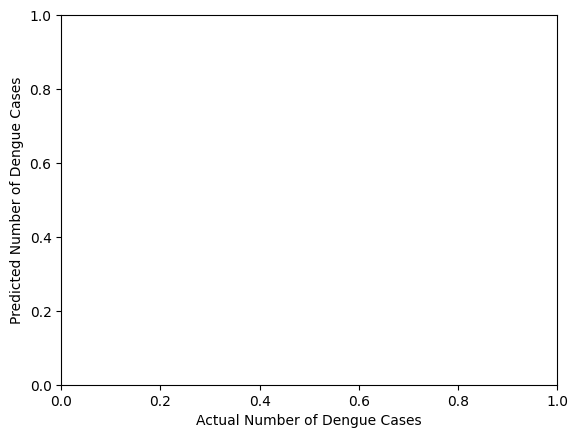

In [19]:
#################################################
## TODO for students:
# Fill in the code in empty places to remove this error
# raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
#################################################


# Create a new instance of the LinearRegression class
reg_model = ... # add code here

# Train the model on the training data i.e on df_cleaned_train,cases_train
...  # add code here

# Print the R^2 score of the trained model on the training data
print('r^2 on training data is: ')
# print(reg_model.score(...,...))

# Print the R^2 score of the trained model on the test data
print('r^2 on test data is: ')
# print(reg_model.score(...,...))

# Create a scatter plot of the predicted values vs. the actual values for the test data
# plt.scatter(...,reg_model.predict(df_cleaned_test))


# Add axis labels to the scatter plot
plt.xlabel('Actual Number of Dengue Cases')
plt.ylabel('Predicted Number of Dengue Cases')

r^2 on training data is: 
0.15932380809444602
r^2 on test data is: 
0.12345655861142157


Text(0.5, 1.0, 'Predicted values vs. the actual values for the test data')

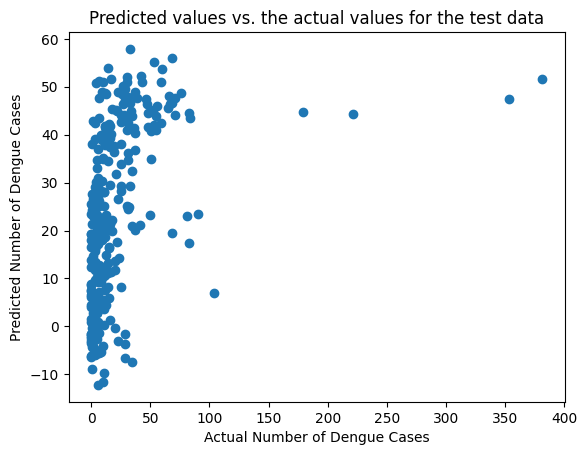

In [20]:
# to_remove solution


# Create a new instance of the LinearRegression class
reg_model = LinearRegression()

# Train the model on the training data
reg_model.fit(df_cleaned_train,cases_train)

# Print the R^2 score of the trained model on the training data
print('r^2 on training data is: ')
print(reg_model.score(df_cleaned_train,cases_train))

# Print the R^2 score of the trained model on the test data
print('r^2 on test data is: ')
print(reg_model.score(df_cleaned_test,cases_test))

# Create a scatter plot of the predicted values vs. the actual values for the test data
plt.scatter(cases_test,reg_model.predict(df_cleaned_test))

# Add axis labels to the scatter plot
plt.xlabel('Actual Number of Dengue Cases')
plt.ylabel('Predicted Number of Dengue Cases')
plt.title('Predicted values vs. the actual values for the test data')

<details>
<summary> <font color='orangered'>Click here description of plot  </font></summary>

This code trains a linear regression model on a dataset and evaluates its performance on both the training and test data.

The scatter plot generated at the end of the code shows the predicted values vs. the actual values for the test data. Each point in the scatter plot represents a single data point in the test set. The horizontal axis represents the actual number of dengue cases, while the vertical axis represents the predicted number of dengue cases.

If the predicted values are close to the actual values, the scatter plot will show a diagonal line where the points cluster around. On the other hand, if the predicted values are far from the actual values, the scatter plot will be more spread out and may show a more random pattern of points.

By visually inspecting the scatter plot and looking at the r^2, we can get an idea of how well the model is performing and how accurate its predictions are. How well does the model do?

In [21]:
#@title Evaluating the performance of the model using metrics such as mean absolute error (MAE) and mean squared error (MSE)

y_pred = reg_model.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('RMSE:', mean_squared_error(cases_test, y_pred,squared=False))

MAE: 18.93374886077583
RMSE: 1316.3553077081347


<details>
<summary> <font color='violet'>What is MAE and MSE   </font></summary>
In addition to r^2, Mean Absolute Error (MAE) and Mean Squared Error (MSE) are both metrics used to evaluate the performance of a regression model. They both measure the difference between the predicted values and the actual values of the target variable.

The MAE is calculated by taking the average of the absolute differences between the predicted and actual values:
\begin{align}
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y_i}|
\end{align}
where $n$ is the number of samples, $y_i$ is the actual value of the target variable for sample $i$, and $\hat{y}_i$ is the predicted value of the target variable for sample $i$.

The RMSE is calculated by taking the square root of the average of the squared differences between the predicted and actual values:
\begin{align}
 RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
\end{align} 
The main difference between MAE and RMSE is that RMSE gives more weight to larger errors, because the differences are squared. Therefore, if there are some large errors in the predictions, the MSE will be higher than the MAE.

Both MAE and RMSE have the same unit of measurement as the target variable, and lower values indicate better model performance. However, the choice of which metric to use depends on the specific problem and the goals of the model.

### Think! 2.2: What did you observe?

 Do you think the model performs well enough to be useful in anticipating dengue fever outbreaks? 





---


##(Bonus) Section 2.3 : Handling Different Scenarios
---



### Section 2.3.1: Handling Categorical Regressor 


We chose to remove city as a regressor because it is not a numerical value and therefore does not fit as easily into the linear regression framework. However it is possible to include such categorical data. To do so, you need to turn the string variables representing cities into 'dummy variables', that is, numerical values that stand in for the categories. Here we can simply arbitrarily set one city to the value 0 and the other the value 1. See how including city impacts regression performance

R-squared on training data is:  0.1629350603545877
R-squared on test data is:  0.12105597828261849


Text(0.5, 1.0, 'Predicted vs Actual number of dengue cases (with city as a regressor)')

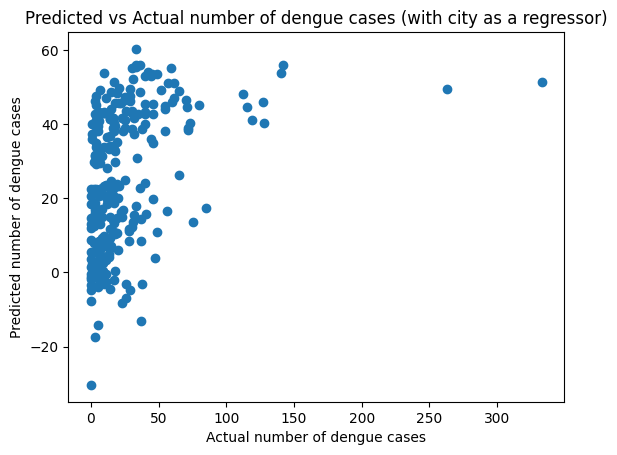

In [22]:
# Include city as a regressor by creating dummy variables for the 'city' column
df_cleaned_city = pd.get_dummies(df_features[['city']], drop_first=True)
df_cleaned_city.reset_index(drop=True, inplace=True)

# Combine the cleaned data with the city dummy variables
df_cleaned_combined = pd.concat([df_cleaned, df_cleaned_city], axis=1)

# Split the data into training and test sets using a random mask
np.random.seed(144)
mask = np.random.rand(len(cases)) < 0.8
df_cleaned_train = df_cleaned_combined[mask]
df_cleaned_test = df_cleaned_combined[~mask]
cases_train = cases[mask]
cases_test = cases[~mask]

# Train a linear regression model with city as a regressor
reg_model_city = LinearRegression()
reg_model_city.fit(df_cleaned_train, cases_train)

# Print R-squared scores for the train and test sets
print('R-squared on training data is: ', reg_model_city.score(df_cleaned_train, cases_train))
print('R-squared on test data is: ', reg_model_city.score(df_cleaned_test, cases_test))

# Create a scatter plot of the predicted values vs. the actual values for the test data
plt.scatter(cases_test, reg_model_city.predict(df_cleaned_test))
plt.xlabel('Actual number of dengue cases')
plt.ylabel('Predicted number of dengue cases')
plt.title('Predicted vs Actual number of dengue cases (with city as a regressor)')

<details>
<summary> <font color='orangered'>Click here description of plot  </font></summary>
The plot generated is a scatter plot with the actual total cases on the x-axis and the predicted total cases on the y-axis. Each point on the plot represents a test data point. 
The accuracy of the model can also be evaluated numerically by computing metrics such as mean absolute error (MAE) and mean squared error (MSE), as well as the R-squared score.

In [23]:
#@title Evaluating the performance of the model using metrics such as mean absolute error (MAE) and root mean squared error (RMSE)

y_pred = reg_model_city.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('RMSE:', mean_squared_error(cases_test, y_pred, squared=False))

MAE: 20.000926671025272
RMSE: 1058.71647438151


Does including the city help the model predict cases?

###  Section 2.3.2 : Handling Integer Valued Dependent Variable 

In our simulated data, the dependent variable was real-valued and followed a normal distribution. Here, the weekly case numbers are integers and are better described by a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). Therefore, plain linear regression is not actually the most appropriate approach for this data. Rather, we should use a generalized linear model, or GLM, which is like linear regression, but includes an extra step that makes it more suited to handle Poisson data. Try to use [scikit-learn's Poisson GLM method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html) on this data. Evaluate the performance o this model on all the same metrics as above. 

r^2 on training data is: 
0.34279370817724775
r^2 on test data is: 
0.23997963689556745


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


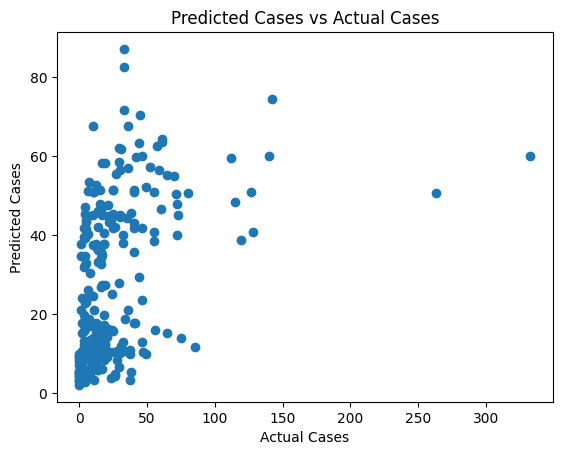

In [24]:
# import PoissonRegressor from sklearn.linear_model
from sklearn.linear_model import PoissonRegressor

# create PoissonRegressor object
poisson_reg = PoissonRegressor()

# fit the PoissonRegressor model with training data
poisson_reg.fit(df_cleaned_train, cases_train)

# calculate r^2 score on training data
print('r^2 on training data is: ')
print(poisson_reg.score(df_cleaned_train, cases_train))

# calculate r^2 score on test data
print('r^2 on test data is: ')
print(poisson_reg.score(df_cleaned_test, cases_test))

# plot predicted values against test data
plt.scatter(cases_test, poisson_reg.predict(df_cleaned_test))

# add plot title and labels
plt.title("Predicted Cases vs Actual Cases")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.show()

<details>
<summary> <font color='orangered'>Click here description of plot  </font></summary>
The plot generated is a scatter plot with the actual total cases on the x-axis and the predicted total cases on the y-axis. Each point on the plot represents a test data point.

In [25]:
#@title Evaluating the performance of the model using metrics such as mean absolute error (MAE) and root mean squared error (RMSE)

y_pred = poisson_reg.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('RMSE:', mean_squared_error(cases_test, y_pred, squared=False))

MAE: 18.715297774757882
RMSE: 1011.3038581219073


### Think! 2.3: Performance of model

Engage in discussion with your pod to share your observations from the additional changes above.
- What did you observe?
- Reflect on how different factors may affect the performance of the model.
- Brainstorm as a group additional ways to improve the model's performance.




---
# **Section 3 : Decision Trees** 

---





In the field of climate science, decision trees and random forests can be powerful tools for making predictions and analyzing complex data.

A decision tree is a type of model that is constructed by recursively splitting the data based on the values of the input features. Each internal node in the tree represents a decision based on the value of a feature, and each leaf node represents a prediction. Decision trees are easy to interpret and can capture complex, nonlinear relationships in the data.

Random forests are a type of ensemble model that combines multiple decision trees to make predictions. Each tree in the forest is trained on a random subset of the data, and the final prediction is the average of the predictions from all the trees. Random forests are particularly useful in climate science because they can handle high-dimensional data with many features and can capture both linear and nonlinear relationships.

By using decision trees and random forests, climate scientists can make accurate predictions about a variety of climate-related variables, such as temperature, precipitation, and sea level rise. They can also gain insights into the complex relationships between different variables and identify important features that contribute to these relationships.

 By training a Random Forest Model in this tutorial, we can better understand the relationship between climate variables and dengue fever cases, and potentially improve our ability to predict and prevent outbreaks.

---
## Section 3.1 Fitting Model and Analyzing Results 
---

Next, you will train a random forest regression model using scikit-learn's RandomForestRegressor class, with default hyperparameters. Use the documentation of the method [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to help you if needed. Evaluate the model's performance on the training and test data and make a scatter plot of predicted vs actual cases for the test data. 
Use `RandomForestRegressor()` which we already imported.

In [26]:
#@title Data Cleaning on original raw data
#@markdown Making sure we are working with cleaned data with the columns we want.
# Drop non-numeric columns and replace missing values
df_cleaned = df_features.drop(['city', 'year', 'week_start_date'], axis=1)
df_cleaned = df_cleaned.fillna(df_cleaned.median())

# Extract the target variable (total_cases)
cases = df_labels['total_cases']

# Split the data into training and testing sets using a random mask
np.random.seed(145) #setting the random seed ensures we are all using the same train/test split
mask = np.random.rand(len(cases)) < 0.8   # use 80% of the data for training

df_cleaned_train = df_cleaned[mask]
df_cleaned_test = df_cleaned[~mask]

cases_train = cases[mask]
cases_test = cases[~mask]

In [27]:
#################################################
## TODO for students:
# Fill in the code in empty places to remove this error
# raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
#################################################

# to_remove solution

# Train a random forest regression model

rf =  ...      # hint : use the RandomForestRegressor we imported earlier
# rf.fit(..., ....) #todo : run fit on 'df_cleaned_train' and 'cases_train'

# Evaluate the model's performance on the training and testing data
print('R^2 on training data is: ')
#print(rf.score(..,...)) #todo : calculate accuracy hint : by calling rf.score() on 'df_cleaned_train' and 'cases_train'

print('R^2 on test data is: ')
print(...)  # todo: #todo : calculate accuracy; hint : by calling rf.score() on 'df_cleaned_test' and 'cases_test'


# uncommnet the code below to check wether your implementation is correct or not
# Plot the predicted vs. actual total cases on the test data
# plt.scatter(cases_test, rf.predict(df_cleaned_test))
# plt.xlabel('Actual Total Cases')
# plt.ylabel('Predicted Total Cases')
# plt.title('Random Forest Regression')
# plt.show()

Accuracy on training data is: 
Accuracy on test data is: 
Ellipsis


R^2 on training data is: 
0.9023658077776089
R^2 on test data is: 
0.43566244844696056


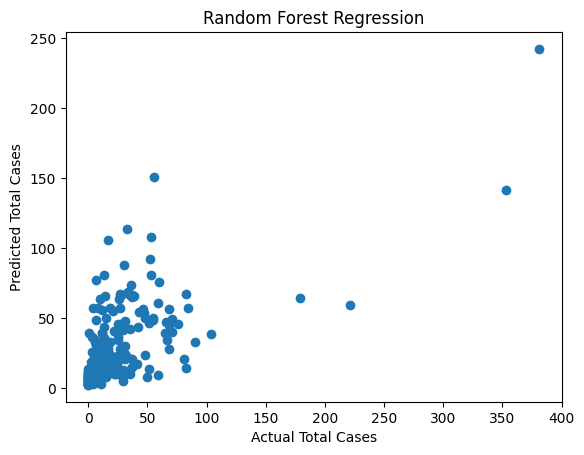

In [28]:
# to_remove solution

# Train a random forest regression model
# use the RandomForestRegressor we imported earlier

rf = RandomForestRegressor()
rf.fit(df_cleaned_train, cases_train)

# Evaluate the model's performance on the training and testing data
print('R^2 on training data is: ')
print(rf.score(df_cleaned_train, cases_train))

print('R^2 on test data is: ')
print(rf.score(df_cleaned_test, cases_test))

# Plot the predicted vs. actual total cases on the test data
plt.scatter(cases_test, rf.predict(df_cleaned_test))
plt.xlabel('Actual Total Cases')
plt.ylabel('Predicted Total Cases')
plt.title('Random Forest Regression')
plt.show()

<details>
<summary> <font color='orangered'>Click here description of plot  </font></summary>
The plot generated is a scatter plot with the actual total cases on the x-axis and the predicted total cases on the y-axis. Each point on the plot represents a test data point. 

In [29]:
#@markdown Evaluating the performance of the model using metrics such as mean absolute error (MAE) and root mean squared error (MSE)

y_pred = rf.predict(df_cleaned_test)
print('MAE:', mean_absolute_error(cases_test, y_pred))
print('RMSE:', mean_squared_error(cases_test, y_pred, squared=False))

MAE: 16.632472924187724
MSE: 847.497906263538


### Think! 3.1: Reflecting on the performance 
Please think and discuss the following questions with your pod members:

- How does the performance of the random forest model compare to that of the linear regression model?
- How does the performance on the test data compare to the performance on the training data?
- What could be the reason behind performing well on the training data but poorly on the test data? Hint: Look up 'overfitting'



```
#  to_remove explanation

* The random forest model generally performs better than the linear regression model as it can capture non-linear relationships between features and target.
* The low performance of the model on the test set might be due to the model learning the noise in the training data instead of the underlying patterns.
* Overfitting is the term for good training performance but poor test performance,where the model fits the training data too closely and fails to generalize to new data.
* Solutions to handle overfitting include reducing model complexity, increasing dataset size, using regularization, or cross-validation. Ensemble models such as random forests also do inherently help control overfitting by averaging many different models
```



---
## Section 3.2 :  Looking at Feature Importance
---
When we train a model to predict an outcome, it's important to understand which inputs to the model are most important in driving that prediction. This is where 'feature importance' methods come in.

One way to measure feature importance is by using the permutation method. This involves randomly shuffling the values of a feature and testing the performance of the model with these permuted values. The amount that the model performance decreases when the feature's values are permuted can provide an indication of how important it is.

For climate scientists, understanding feature importance can help identify key variables that contribute to predicting important outcomes, such as temperature or precipitation patterns.

Thankfully, Sci-kit learn has a method that implements permutation importance, and outputs a normalized measure of how much each feature impacts performance.

In [30]:
#@markdown *Execute this cell to enable the plotting function to be used for plotting performance of our model in next cell: `plot_feature_importance`*

def plot_feature_importance(perm_feat_imp):
    # Increase the size of the plot for better readability
    plt.figure(figsize=(12, 8))

    # Plot the feature importance with error bars in navy blue color
    plt.errorbar(np.arange(len(df_cleaned.columns)), perm_feat_imp['importances_mean'], perm_feat_imp['importances_std'], fmt='o', capsize=5, markersize=5, color='navy')

    # Set the x-axis and y-axis labels and title
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Importance', fontsize=14)
    plt.title('Feature Importance Plot', fontsize=16)

    # Rotate the x-axis labels for better readability
    plt.xticks(np.arange(len(df_cleaned.columns)), df_cleaned.columns, rotation=45, ha='right', fontsize=12)

    # Add gridlines for better visualization
    plt.grid(True, axis='y', linestyle='--')

    # Add a color map for better visualization
    # The color of each bar represents the relative feature importance value
    colors = cm.Blues(perm_feat_imp['importances_mean'] / perm_feat_imp['importances_mean'].max())
    plt.bar(np.arange(len(df_cleaned.columns)), perm_feat_imp['importances_mean'], color=colors)

    # Display the plot
    plt.show()

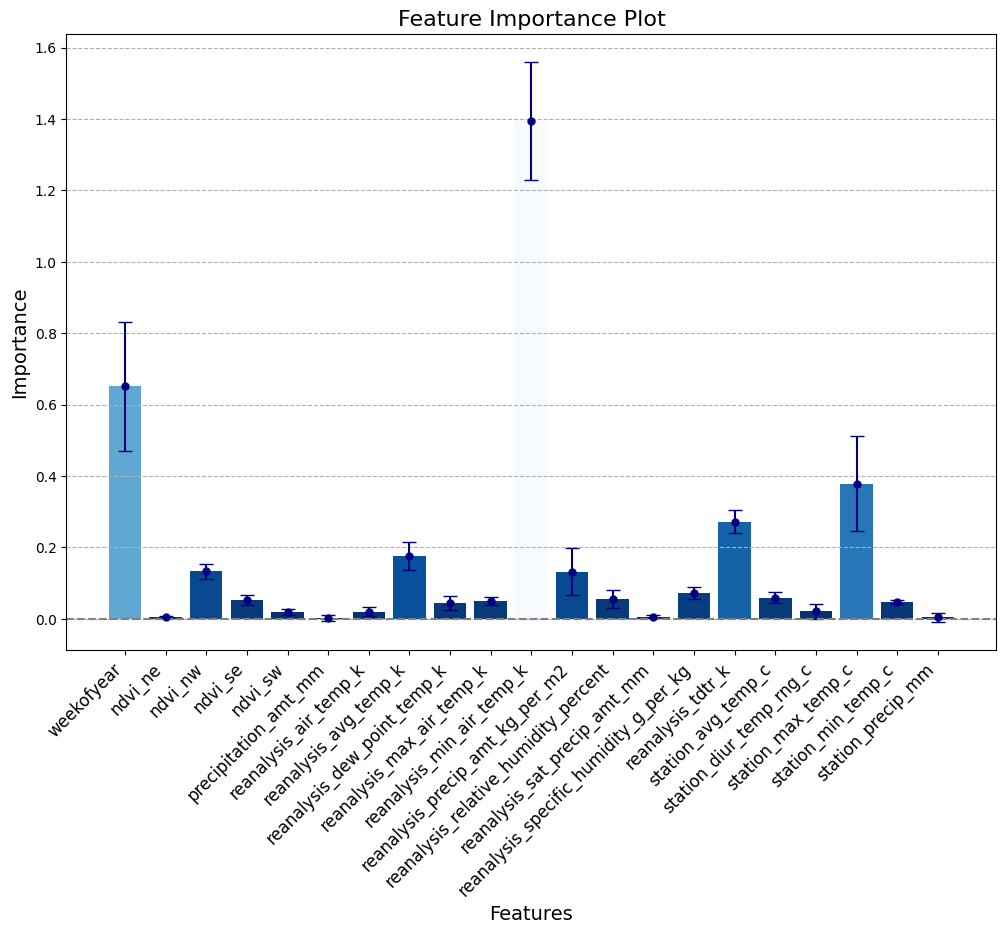

In [31]:
# Plot the feature importance of each input to the model

# Import the permutation_importance function from the sklearn.inspection module
from sklearn.inspection import permutation_importance

# Use permutation_importance to calculate the feature importances of the trained random forest model
# df_cleaned_test contains the preprocessed test dataset, cases_test contains the actual number of dengue fever cases in the test dataset
# n_repeats specifies how many times the feature importances are calculated for each feature
# random_state is used to seed the random number generator for reproducibility
perm_feat_imp = permutation_importance(rf, df_cleaned_test, cases_test,
                           n_repeats=10,
                           random_state=0)

# Create a plot of the feature importances
plot_feature_importance(perm_feat_imp)

<details>
<summary> <font color='orangered'>Click here for description of plot 📊 </font></summary>

The plot generated is a feature importance plot that provides insights into the importance of different features in predicting the target variable. Let's break down the key elements and address the specific issues raised.

1. Feature Importance Representation:
- Each bar in the plot represents a feature from the dataset.
- The color and height of each bar represents the relative feature importance value.
- Darker shades of blue/higher values indicate higher importance
- Specifically, importance is measured as the decrease in performance that comes from permuting that feature.

2. Error Bars and Variability:
- The error bars present around each feature's bar represent the variability in importance values.
- They indicate the uncertainty or variability in the importance estimates calculated through repeated permutations.
- A longer error bar suggests higher variability, meaning the importance value for that feature may change significantly with different permutations.
- Conversely, a shorter error bar indicates lower variability, indicating that the importance value is relatively stable and less influenced by random permutations.

Understanding the feature importance plot empowers us to identify the most influential factors within our dataset. By recognizing these crucial features, we gain deeper insights into the underlying relationships within climate science data. This knowledge is invaluable for further analysis and informed decision-making processes within our field.

It's important to note that the interpretation of feature importance can vary depending on the dataset and modeling technique employed. To gain a comprehensive understanding of feature importance analysis in the context of climate science, it is advisable to consult domain experts and explore additional resources tailored to your specific interests.

By delving into the world of feature importance, we unlock the potential to unravel the intricate dynamics of our climate science data and make meaningful contributions to this fascinating field of study.

 </summary>

### Think! 3.2 : Reflection on importance 🧠💭
Please think and discuss the following questions with your pod members:

- Which features were most important?
- Why do you think these features are important?
- Do you think understanding the importance of the different features could help you make a better model?


---
## (Bonus⚡) Section 3.3: Comparing Feature Importance Methods

The Random Forest Regression model also has a built-in estimation of feature importance. This estimation comes directly from how the decision trees are trained; specifically, it is a measure of how useful the feature is at splitting the data averaged across all nodes and trees. We can access these values directly from the trained model.

Different methods of estimating feature importance can come to different conclusions and may have different biases. Therefore it is good to compare estimations across methods. How do these two methods compare? 

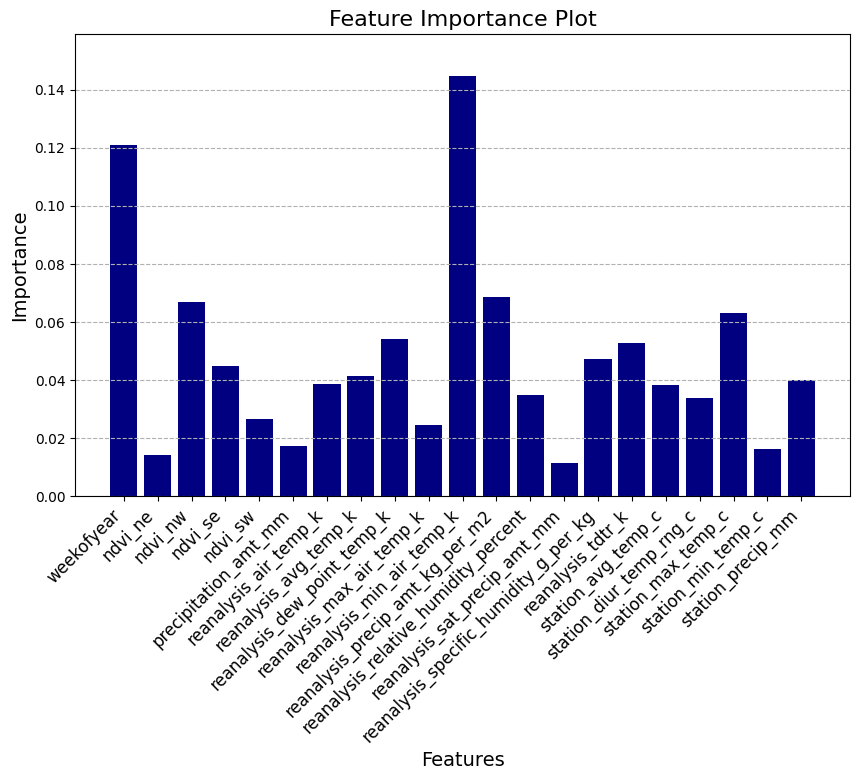

In [32]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a bar chart of the feature importances returned by the random forest model
plt.bar(np.arange(len(rf.feature_importances_)), rf.feature_importances_, color='navy')

# Set the x-axis and y-axis labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importance Plot', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(np.arange(len(df_cleaned.columns)), df_cleaned.columns, rotation=45, ha='right', fontsize=12)

# Set the y-axis limit to better visualize the differences in feature importance
plt.ylim(0, rf.feature_importances_.max() * 1.1)

# Add gridlines for better visualization
plt.grid(True, axis='y', linestyle='--')

# Display the plot
plt.show()


<details>
<summary> <font color='orangered'>Click here for description of plot </font></summary>

The bar chart displays the feature importances returned by the random forest model. Each bar represents the relative importance of each feature in predicting the number of dengue fever cases in the preprocessed dataset. The y-axis represents the importance of the features, while the x-axis displays the name of the features.



---


# Summary

In these tutorials, we explored various methods of analyzing the Dengue Fever dataset from a climate science perspective. We started by using pandas to handle the data and visualizing trends and anomalies. Next, we applied linear regression to model the data and handle categorical and integer-valued data. Finally, we applied random forest regression to improve the performance of our model and learned about feature importance. Overall, learners gained practical experience in using different modeling techniques to analyze and make predictions about real-world climate data. 

---



#Extra Exercises or Project Ideas

1. Try experimenting with different hyperparameters for the random forest model, such as n_estimators, max_depth, and min_samples_leaf. How do these hyperparameters affect the performance of the model? 

2. Try using a different machine learning algorithm to predict the number of Dengue fever cases, such as a support vector machine. How does the performance of these algorithms compare to the random forest model?

3. Try using a different dataset to predict the number of cases of a different disease or health condition. How does the preprocessing and modeling process differ for this dataset compared to the Dengue fever dataset?

4. Try visualizing the decision tree of the random forest model using the plot_tree function of the sklearn package. What insights can you gain from the visualization of the decision tree?


---





<p align='right'><font color='gree'>Congratulations!</font> 🎉  You have reached the end of Tutorial 2!!</p>